# Reading and Writing data files using CSV.jl

<div class="alert alert-info" role="alert">
Estimated time to complete: 1 -2 hours
</div>

In [1]:
using DelimitedFiles
using DataFrames
using CSV
using Random
using Distributions
using Plots

## Making some fake data and writing it out to a data file
### Create four arrays using Julia: <br>
a. an array of times, $t$,  from 0.0 up to and including 10.0 seconds, in steps of 0.5 seconds<br>
b. an array of Gaussian disributed time uncertainties, $\delta t$, with $\sigma = 0.2\;\mathrm{s}$. <br>
c. an array of positions, $y$, described by $y = \frac{1}{2} g t^2$, where $g = 9.80 \pm 0.01\;\mathrm{m/s}^2$<br>
d. an array of position uncertainties consistent with the time uncertainties, and consistent with the uncertainty on $g$. For this last part, show explicity in a markdown cell (using $\LaTeX$ to typeset the mathematics) how to compute this uncertainty in $y$<br>

In [2]:
# Your code here

In [3]:
σ = 0.20
μ = 0.00 
g = 9.80
δg = 0.01
t = collect(0:0.5:10.0)
δt = abs.(rand(Normal(μ , σ), length(t)))
y = round.(0.5*g*t.^2; digits=3);

<div class="alert alert-success" role="alert">
In this markdown cell, show explicity (using $\LaTeX$ to typeset the mathematics) how to compute the uncertainty in $y$<br>
</div>

<div class="alert alert-success" role="alert">
To compute the uncertainty in $y$, we use the differential error propagation method where

$$ \delta y \approx \sqrt{ \left(\frac{\partial y}{\partial g}\delta g\right)^2 + \left(\frac{\partial y}{\partial t}\delta t\right)^2 }$$

Computing the partial derivatives and substituting, we want to compute

$$ \delta y \approx \sqrt{ \left( \frac{t^2}{2}\;\delta g \right)^2 + \left( gt \;\delta t \right)^2 }, $$

but, since the function for $y$ is a simple product of powers, we could have used the fact that this expression simplifies to 

$$ \delta y \approx  y \, \sqrt{ \left( \frac{\delta g}{g} \right)^2 + \left( 2\frac{\delta t}{t} \right)^2 }. $$

I will use this second form to compute $\delta y$. Notice that if I do the sensible thing using Julia, I have a problem when $t=0$:
</div>

In [4]:
# now compute δy (one line of code; be careful to use the dot syntax properly)
#
δy = y.*sqrt.( (δg/g).^2 .+ (2*δt ./t).^2 )

21-element Vector{Float64}:
 NaN
   1.4866358886774618
   1.5258830644926438
   0.38278976100769385
   4.418933996498686
   0.9743474686273895
   5.488797789186764
   8.26898088806218
   7.485399611730478
  13.652302294466196
   1.511607536502671
   6.519229344703498
  15.111972672636064
   8.135681599160447
   3.6435536821719925
   2.364859211764191
   0.7758409132403967
   3.838710216163981
   1.652990230843701
   2.584929581743295
   5.00236838322454

<div class="alert alert-success" role="alert">
The fix for this is to compute $\delta y$ forgoing the first element, and then manually inserting 0.0 for the first value of δy when done. You can accomplish this in two lines of code; in the second line, you will want to use the pushfirst! command to insert 0.0 for δy.
</div>

In [5]:
# your code here
δy = y[2:end ] .*sqrt.( (δg/g).^2 .+ (2*δt[2:end]./t[2:end]).^2 )
δy = pushfirst!(δy, 0.0);  # manually insert 0.0 before array index 0 of δy

### Write out the data using DelimitedFiles
Write the data out:<br>
- in four columns labeled t, dt, y, dy
- the first row is a header row
- the second row specifies the units
- the file to write should be called fake_free_fall.txt. 
- write all numerical values with only two decimal places

See [DelimitedFiles.jl documentation](https://docs.julialang.org/en/v1/stdlib/DelimitedFiles/) for info about the function *writedlm(), and see [Storing output on a file](https://www.geeksforgeeks.org/storing-output-on-a-file-in-julia/) to read about the *write()* command; you will use this to write out the header lines.
The first three lines of your file should look like

| t   | dt |  y   | dy |
| :--- | :-----------| :--- | :-----------|
|   s     |      s       |    m     |      m       |
| 0.00     | 0.10 | 0.00 | 0.00 |

##### Other good references about file i/o
[Introducing Julia: Working with text files](https://en.wikibooks.org/wiki/Introducing_Julia/Working_with_text_files) </br>
[Julia Discourse: Reading text or csv files](https://discourse.julialang.org/t/reading-text-or-csv-files-and-assigning-values-to-variable-names/50610)</br>

In [6]:
# your code here!
open("fake_free_fall.txt", "w") do io
    write(io, "t  dt  y  dy\n") 
    write(io, "s   s  m   m\n")
    writedlm(io, round.([t δt y δy], digits=3))
end

<div class="alert alert-success" role="alert">
Another option with Julia is to bundle the vectors into a dataframe and then use the CSV.jl package to write out the dataframe to a file. When you do this, the file will automatically have the column names as the first line in the file. I will leave this here as a piece of information for you; run the cell and then use jupyterlab's file browser to look at the file.
</div>

In [7]:
df = DataFrame(time=round.(t, digits=2), dt=δt, y=y, dy=δy )
CSV.write("fake_data.txt", round.(df, digits=2); delim=',')

"fake_data.txt"

### Reading in a data file using readdlm()
For straighforward data files (no missing values or strange type switching), readdlm() is a simple way to read in
data that is saved as a text or a csv (comma separated value) file. This means that you could use a simple spreadsheet when
manually recording data and save it as .txt or .csv and it will be easy to read. 

Use readdlm() to read the data file fake_free_fall.txt; read the data directly into an array called *data*.
When you do read the file, you will see that you obtain the two header lines as well as the numerical data, 
so add a code cell after the initial import to extract only the needed numerical data into vectors named: t, dt, y, dy. 

In [8]:
data = readdlm("fake_free_fall.txt")

23×4 Matrix{Any}:
   "t"   "dt"     "y"     "dy"
   "s"   "s"      "m"     "m"
  0.0   0.109    0.0     0.0
  0.5   0.303    1.225   1.487
  1.0   0.156    4.9     1.526
  1.5   0.026   11.025   0.383
  2.0   0.225   19.6     4.419
  2.5   0.04    30.625   0.974
  3.0   0.187   44.1     5.489
  3.5   0.241   60.025   8.269
  4.0   0.191   78.4     7.485
  4.5   0.31    99.225  13.652
  5.0   0.031  122.5     1.512
  5.5   0.121  148.225   6.519
  6.0   0.257  176.4    15.112
  6.5   0.128  207.025   8.136
  7.0   0.053  240.1     3.644
  7.5   0.032  275.625   2.365
  8.0   0.009  313.6     0.776
  8.5   0.046  354.025   3.839
  9.0   0.018  396.9     1.653
  9.5   0.027  442.225   2.585
 10.0   0.051  490.0     5.002

In [9]:
# Extract the numerical values from each column into t, dt, y, dy:

In [10]:
t =  data[3:end,1]
dt = data[3:end,2]
y =  data[3:end,3]
dy = data[3:end,4];

### Now plot the data
Make a plot of $y$ vs $t$, and include error bars on each point. figure *size* 800 px by 500 px, and the xguidefontsize=14, xtickfontsize=12. Similarly for the y-axis labelsize and ticklabelsize. Use Julia's Plots package with the GR backend. You will want to use the Measures package to set a margin so that the axes labels are not cut off.

In [11]:
# needed imports and plot size setup for free:
using Plots
using LaTeXStrings
using Measures
gr()
plot(size=(800,500), margin=5mm);  # remove the margin=5mm (and the semicolon) to see why I put this here.

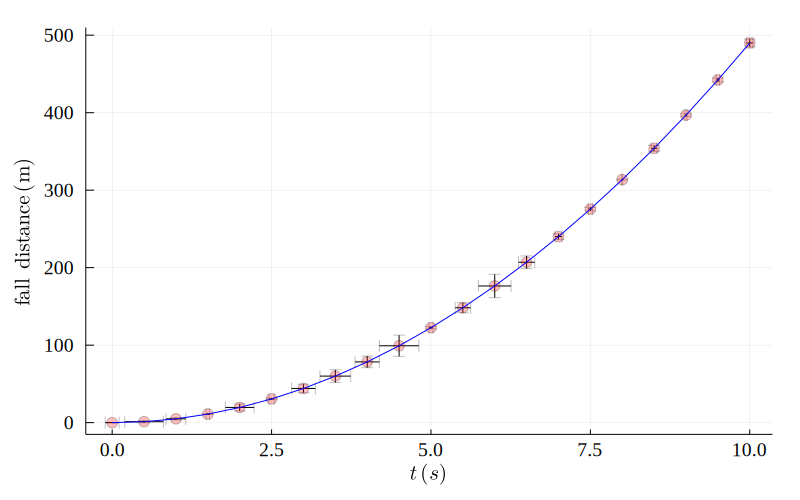

In [12]:
# now add your code to make the plot
scatter!(t, y, xerror = dt, yerror = dy, 
        markerstrokecolor = :black, 
        markercolor = :red, 
        markersize=6, 
        markeralpha=0.25, legend=false)

plot!(t,y, color=:blue)

plot!( xlabel = L"t\;(s)", ylabel = L"\mathrm{fall\;\;distance\;(m)}", xguidefontsize=14, yguidefontsize=14)
plot!(xtickfontsize=12, xtickfontfamily=:Times, ytickfontfamily=:Times, ytickfontsize=12)